<a href="https://colab.research.google.com/github/Anirudh-sk/LoanPredict/blob/master/Loan_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score




In [5]:
url= './drive/MyDrive/Loan Predict/loan-train.csv'
df = pd.read_csv(url)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dropna(inplace=True) # Remove empty cells
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
to_drop=['Loan_ID', 'Gender', 'Property_Area','Loan_Amount_Term','CoapplicantIncome']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,Yes,1,Graduate,No,4583,128.0,1.0,N
2,Yes,0,Graduate,Yes,3000,66.0,1.0,Y
3,Yes,0,Not Graduate,No,2583,120.0,1.0,Y
4,No,0,Graduate,No,6000,141.0,1.0,Y
5,Yes,2,Graduate,Yes,5417,267.0,1.0,Y


In [10]:
df['Married'] = df['Married'].replace('Yes', 1)
df['Married'] = df['Married'].replace('No', 0)

df['Education'] = df['Education'].replace('Graduate', 1)
df['Education'] = df['Education'].replace('Not Graduate', 0)

df['Self_Employed'] = df['Self_Employed'].replace('Yes', 1)
df['Self_Employed'] = df['Self_Employed'].replace('No', 0)

df['Loan_Status'] = df['Loan_Status'].replace('Y', 1)
df['Loan_Status'] = df['Loan_Status'].replace('N', 0)

df['Dependents'] = df['Dependents'].replace('3+', 3)

df['ApplicantIncome'] = df['ApplicantIncome']*30
df['LoanAmount'] = df['LoanAmount']*1000

df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,1,1,0,137490,128000.0,1.0,0
2,1,0,1,1,90000,66000.0,1.0,1
3,1,0,0,0,77490,120000.0,1.0,1
4,0,0,1,0,180000,141000.0,1.0,1
5,1,2,1,1,162510,267000.0,1.0,1


<Axes: >

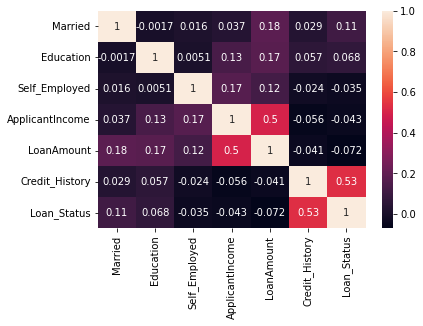

In [11]:
correlation = df.corr()
# print(correlation["Total"].sort_values(ascending=False))

sns.heatmap(data=correlation, annot=True)

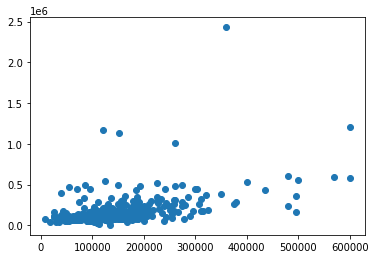

In [12]:
plt.scatter(df['LoanAmount'],df['ApplicantIncome'])

array([[<Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Self_Employed'}>],
       [<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Credit_History'}>],
       [<Axes: title={'center': 'Loan_Status'}>, <Axes: >, <Axes: >]],
      dtype=object)

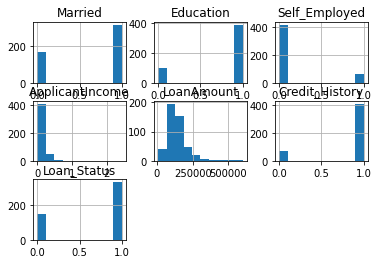

In [13]:
df.hist()

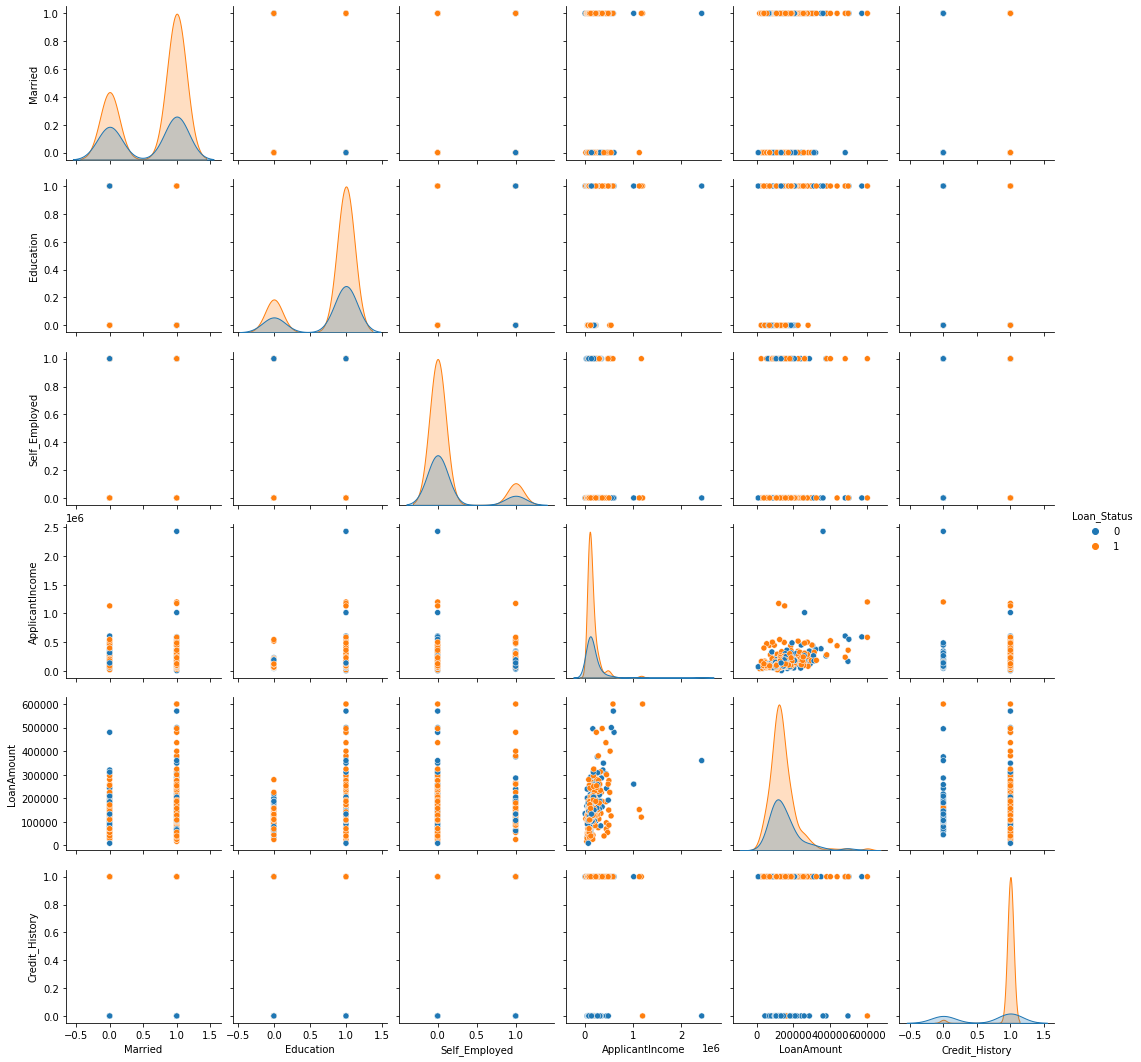

In [14]:
sns.pairplot(data=df, hue='Loan_Status')

In [15]:
df.head()


,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,1,1,0,137490,128000.0,1.0,0
2,1,0,1,1,90000,66000.0,1.0,1
3,1,0,0,0,77490,120000.0,1.0,1
4,0,0,1,0,180000,141000.0,1.0,1
5,1,2,1,1,162510,267000.0,1.0,1


In [16]:
X = df[['Married','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y = df['Loan_Status']

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
# model = LogisticRegression(solver='liblinear', random_state=0)
# model.fit(X_train, y_train)

In [17]:
clf_gini = DecisionTreeClassifier(max_depth=1)
  
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [18]:
y_pred = clf_gini.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
18,0,1
161,0,1
182,1,1
340,0,1
216,0,1
...,...,...
532,0,0
534,1,1
142,1,1
591,0,1


In [19]:
# y_pred = model.predict(X_test)
# df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df1

In [20]:
# model.score(X_test,y_pred)*100


In [21]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
      
print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix:  [[13 22]
 [ 0 61]]
Accuracy :  77.08333333333334
Report :                precision    recall  f1-score   support

           0       1.00      0.37      0.54        35
           1       0.73      1.00      0.85        61

    accuracy                           0.77        96
   macro avg       0.87      0.69      0.69        96
weighted avg       0.83      0.77      0.74        96



[Text(0.5, 0.75, 'x[6] <= 0.5\ngini = 0.415\nsamples = 384\nvalue = [113, 271]'),
 Text(0.25, 0.25, 'gini = 0.215\nsamples = 57\nvalue = [50, 7]'),
 Text(0.75, 0.25, 'gini = 0.311\nsamples = 327\nvalue = [63, 264]')]

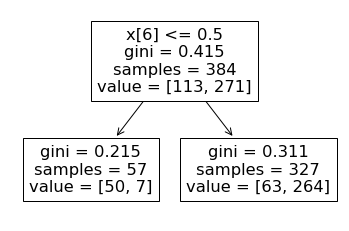

In [22]:
from sklearn import tree

tree.plot_tree(clf_gini)

# Enter the Values Manually

In [23]:
# X = df[['Married','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]

Married = int(input("Enter 0 or 1 : "))
Dependents = int(input("Enter 0 or 1 or 2 or 3 : "))
Education = int(input("Enter 0 or 1 : "))
Self_Employed = int(input("Enter 0 or 1 : "))
ApplicantIncome = int(input("Enter monthly salary : "))
LoanAmount = int(input("Enter Loan Amount : "))
Credit_History = int(input("Enter 0 or 1 : "))

# atten = atten.reshape(-1,1)
own_pred = clf_gini.predict([[Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History]])
if own_pred[0] == 1:
  print("Loan Approved")
else : 
  print("Loan Rejected")

Enter 0 or 1 : 0
Enter 0 or 1 or 2 or 3 : 2
Enter 0 or 1 : 1
Enter 0 or 1 : 1
Enter monthly salary : 22000000
Enter Loan Amount : 20000000000
Enter 0 or 1 : 1
Loan Approved


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# exporting the model using pickle

In [24]:
import pickle

In [25]:
pickle.dump(clf_gini, open("./drive/MyDrive/Loan Predict/model.pkl", 'wb'))

# testing the pickle file

In [26]:
pickled_model = pickle.load(open('./drive/MyDrive/Loan Predict/model.pkl', 'rb'))
pickled_model.predict(X_test) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])